# 📝 Pattern Recognition & Biometrics. Lab session 3.- Classification

By Omar Galarraga & Sonia Garcia

In this lab session, we will focus on a classification task with $N_c = 3$ classes. We would like to predict penguin species based on anatomical measures (adapted from INRIA [n/d]).  

We will be using a part of the [Palmer penguins dataset](https://allisonhorst.github.io/palmerpenguins/)

Each penguin in the database belongs to one of the three species of the Pygoscelis genre: Adelie, Gentoo and Chinstrap [see figure below].  

![Figure 1. Image of penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

The classification will be based on two features: bill/culmen length and depth [see figure below].

![Figure 2. Image of culmen](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

## Part I. Linear Classification: Naive Bayes Classifier

Let's start by loading the data and doing some data exploration...

In [79]:
import pandas

##If using Google Colab
from google.colab import files
files.upload()
PenguinData = pandas.read_csv("penguins_classification.csv")

#PenguinData = pandas.read_csv("./datasets/penguins_classification.csv")
#PenguinData[:]

Saving penguins_classification.csv to penguins_classification (1).csv


Let's look at the number of examples by species...

In [80]:
PenguinData["Species"].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: Species, dtype: int64

* I.1) Compute the prior probability for each class

In [81]:
#Write your code here
P_A = 151/(151+123+68)
P_G = 123/(151+123+68)
P_C = 68/(151+123+68)
print(P_A,P_G,P_C)

0.4415204678362573 0.35964912280701755 0.19883040935672514


Let's look at the histrograms of the input variables...

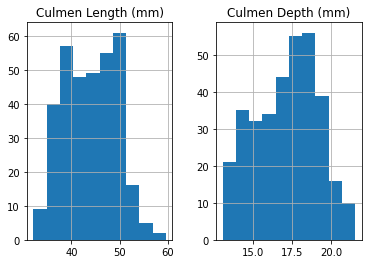

In [82]:
#%matplotlib inline
_ = PenguinData.hist()

Now look at the variable distributions per class.

* I.2) Can we find a linear separator between classes?

 Answer: we cann't find a linear separator between classes. but we can find linear separator to fix it 

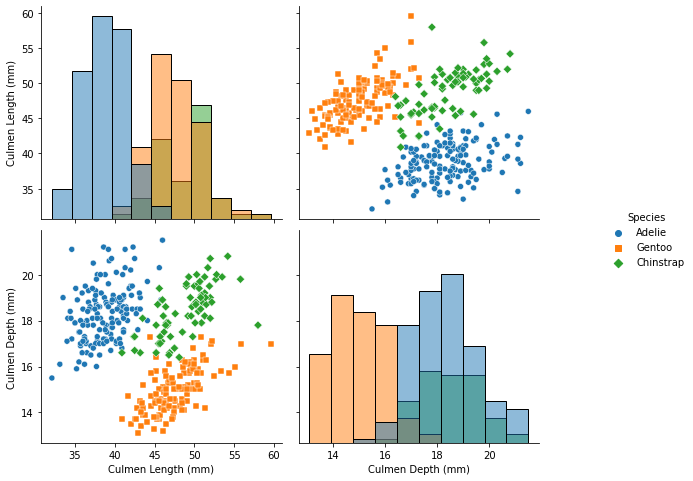

In [6]:
import seaborn as sns
pairplot_figure = sns.pairplot(data = PenguinData, hue = "Species", diag_kind="hist", markers = ["o", "s", "D"])
pairplot_figure.fig.set_size_inches(10, 7)

Redo the previous graph, but this time replace the histrograms by kernel estimations of the density probability function per class. 
* I.3) Can we classify with just one variable? 
 
 Answer: we can‘t use just one variable for perfect classification,because it will have high error rate. We can consider decision tree to classify.

* I.4) Come up with a decision rule combining both features. (Hint: you can use a decision tree as an inspiration)

Answer:We can use decision trees to classify these features. We can classify Adelie and Gentoo, Chinstrap into two categories at Clumen Lengh = 30. At Clumen Lengh = 35, Gentoo, Chinstrap is divided into two categories.

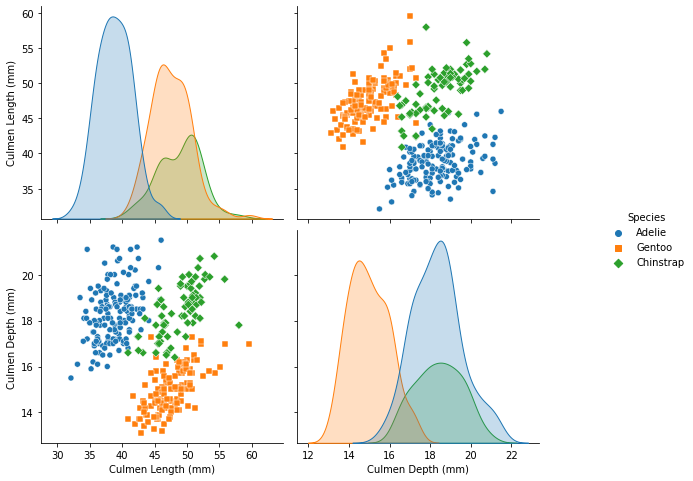

In [7]:
import seaborn as sns
pairplot_figure2 = sns.pairplot(data = PenguinData, hue = "Species", diag_kind="kde", markers = ["o", "s", "D"])
pairplot_figure2.fig.set_size_inches(10, 7)

* I.5) Create a naive Bayes classifier, train it with *data_train* and *target_train* defined below, for predicting the penguin species (Hint: give the label of the class that maximizes the probability $ P(c/x) $)

In [93]:
     
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
data_train, data_test, target_train, target_test = train_test_split(PenguinData[['Culmen Length (mm)', 'Culmen Depth (mm)']], PenguinData[["Species"]], test_size=0.3, shuffle=True, random_state=42)


In [99]:
#Write your code here

class NaiveBayesClassifier():
    
    def calc_prior(self, features, target):
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()
        return self.prior
    
    def calc_statistics(self, features, target):
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()      
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []
        for i in range(self.count):
            prior = np.log(self.prior[i])
            conditional = np.sum(np.log(self.gaussian_density(i, x)))
            posterior = prior + conditional
            posteriors.append(posterior)
            #print(posteriors)
        return self.classes[np.argmax(posteriors)]
     
    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
    
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

In [95]:
target_train= target_train['Species']
target_test=target_test['Species']

In [101]:
x = NaiveBayesClassifier()
x.fit(data_train, target_train)

* I.6) Predict for the examples in *data_test* and compare with the true labels in *target_test*. Compute the classifier's error rate.

In [102]:
#Write your code here

data_pred = x.predict(data_test)
pre = np.array(data_pred)
x.accuracy(target_test,data_pred)
error = 1-x.accuracy(target_test,data_pred)
print("The error rate is",error)


The error rate is 0.058252427184465994


* I.7) Compute the minimal error risk of the classifier (you can first find the thresholds analytically). Compare with the error rate computed previously.

In [ ]:
#Write your code here

## Part II. Nonlinear classification with neural networks

We will apply to the same classification problem a neural network based on the multilayer perceptron (MLP), also known as feedforward neural network.

Let's begin with the data preprocessing stage. For all the input variables to equally contribute to the model,  it is crucial to normalize the data. 
In this case, we will center and reduce the inputs (substract the mean and divide by the standard deviation). 

On the other hand, we must convert the labels into quantitative variables to be able to insert them into the neural model. We will use in this case a binary vector encoding like the following:

$$
\begin{array}{ccc}
Adelie & \rightarrow & \left(1\,0\,0\right)^T\\
Gentoo & \rightarrow & \left(0\,1\,0\right)^T\\
Chinstrap & \rightarrow & \left(0\,0\,1\right)^T\\
\end{array}
$$

In [83]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

input_preprocessor = StandardScaler()
target_preprocessor = OneHotEncoder(sparse=False)

data = input_preprocessor.fit_transform(PenguinData[['Culmen Length (mm)', 'Culmen Depth (mm)']])
target = target_preprocessor.fit_transform(PenguinData[['Species']])

normdf = pandas.DataFrame(np.concatenate((PenguinData[['Culmen Length (mm)', 'Culmen Depth (mm)']], data), axis=1), columns=['Var1', 'Var2', 'Var1 norm', 'Var2 norm'])
print("Normalized input data")
print(normdf[:10])
print("Target output")
print(pandas.DataFrame(target, columns=['Adelie', 'Gentoo', 'Chinstrap']))

Normalized input data
   Var1  Var2  Var1 norm  Var2 norm
0  39.1  18.7  -0.884499   0.785449
1  39.5  17.4  -0.811126   0.126188
2  40.3  18.0  -0.664380   0.430462
3  36.7  19.3  -1.324737   1.089724
4  39.3  20.6  -0.847812   1.748985
5  38.9  17.8  -0.921185   0.329038
6  39.2  19.6  -0.866155   1.241861
7  34.1  18.1  -1.801661   0.481175
8  42.0  20.2  -0.352544   1.546135
9  37.8  17.1  -1.122961  -0.025949
Target output
     Adelie  Gentoo  Chinstrap
0       1.0     0.0        0.0
1       1.0     0.0        0.0
2       1.0     0.0        0.0
3       1.0     0.0        0.0
4       1.0     0.0        0.0
..      ...     ...        ...
337     0.0     1.0        0.0
338     0.0     1.0        0.0
339     0.0     1.0        0.0
340     0.0     1.0        0.0
341     0.0     1.0        0.0

[342 rows x 3 columns]


Now we create an MLP with $N_{hl} = 1$ hidden layer containing $m=2$ neurons. 

* II.1) What is the size of the *input layer*?

Answer:2
* II.2) What is the size of the *output layer*?

Answer:3

In [84]:
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
m = 2
mlpmodel = MLPClassifier(hidden_layer_sizes=(m, ), activation="logistic", solver="lbfgs", max_iter=500)
set_config(display='diagram')
mlpmodel

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=500,
              solver='lbfgs')

In order to train the MLP and test its generalization capacity, we need to:

* a) After shuffling the order of observations, separate the data into a train subset (here $70\%$) and a test subset (we'll use $30\%$ here)
* b) Train the model using only the train set 
* c) Then predict for the test set  

In [85]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, shuffle=True, random_state=42)

#Training
mlpmodel.fit(X_train, y_train)

pred_tr = mlpmodel.predict(X_train)
pred_tr_label = target_preprocessor.inverse_transform(pred_tr) #Decoding the binary vectors
train_label = target_preprocessor.inverse_transform(y_train)

#Test
pred_test = mlpmodel.predict(X_test)
pred_test_label = target_preprocessor.inverse_transform(pred_test)
test_label = target_preprocessor.inverse_transform(y_test)
table_test = pandas.DataFrame(np.concatenate((pred_test_label,test_label), axis=1), columns=['Predicted label', 'True label'])
table_test[65:75]

,Predicted label,True label
65,Chinstrap,Adelie
66,Adelie,Adelie
67,Adelie,Adelie
68,Adelie,Adelie
69,Adelie,Adelie
70,Adelie,Adelie
71,Adelie,Adelie
72,Chinstrap,Chinstrap
73,Adelie,Chinstrap
74,Chinstrap,Chinstrap


* II.3) How many classification errors do you find in the table above?

     Answer:We can find 2 classification errors in the table above.

Computing the model performance:

In [86]:
#Performance training
acc_tr = (pred_tr_label == train_label).mean()

#Performance test
acc_test = (pred_test_label == test_label).mean()

print(f"The training accuracy is {acc_tr:.4f}")
print(f"The testing accuracy is {acc_test:.4f}")

The training accuracy is 0.9707
The testing accuracy is 0.9806


* II.4) Compute the confusion matrix (for the test set). Which are the best and the worst predicted classes?

Answer：From the confusing distance array, we can know that Chinstrap is the best. There are errors in Adelie and Gentoo

In [87]:
#Write your code here
from sklearn.metrics  import confusion_matrix  
import numpy as np

#Predict the test results
pred_test = mlpmodel.predict(X_test)
pred_test_label = target_preprocessor.inverse_transform(pred_test)

print("Confusion Matrix\n",confusion_matrix(pred_test_label,test_label))

Confusion Matrix
 [[49  1  0]
 [ 1 18  0]
 [ 0  0 34]]


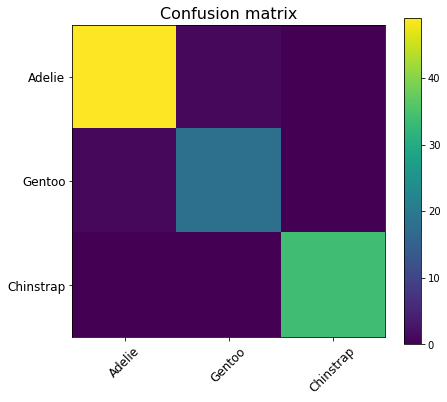

In [88]:
# confusion matrix 
import matplotlib.pyplot as plt
classes= ['Adelie', 'Gentoo', 'Chinstrap']
from sklearn.metrics  import confusion_matrix

plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(pred_test_label,test_label))
plt.xticks(np.arange(3),classes, rotation=45, fontsize=12)
plt.yticks(np.arange(3), classes, fontsize=12)
plt.colorbar()
plt.show()

We just measured the model performance with a unique test set. We must use cross-validation to properly estimate the generalization of the model.

* II.5) Perform a  K-fold cross-validation with $K=10$ (use *data_shuffle* and *target_shuffle* defined below). Compute the mean and the standard deviation of the accuracy on both train and test sets.

In [90]:
import numpy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
data_shuffle1, data_shuffle2, target_shuffle1, target_shuffle2 = train_test_split(data, target, train_size=341, shuffle=True, random_state=0)
data_shuffle = numpy.concatenate((data_shuffle1, data_shuffle2), axis=0)
target_shuffle = numpy.concatenate((target_shuffle1, target_shuffle2), axis=0)

#Write your code here
accuracy = cross_validate(mlpmodel, data_shuffle, target_shuffle, cv=10,return_train_score=True)
print("The mean of the accuracy in train sets is", accuracy['train_score'].mean())
print("The standard deviation of the accurcy in train sets is",accuracy['train_score'].std())
print("The mean of the accuracy in test sets is", accuracy['test_score'].mean())
print("The standard deviation of the accurcy in test sets is",accuracy['test_score'].std())




The mean of the accuracy in train sets is 0.9678338762214984
The standard deviation of the accurcy in train sets is 0.007044239481126824
The mean of the accuracy in test sets is 0.9618487394957983
The standard deviation of the accurcy in test sets is 0.026499783819416606


So far we arbitrarily chose $m=2$ for the number of neurons in the hidden layer. The optimal number of hidden neurons $m_{opt}$ should be found empirically, by varying the value of $m$ and evaluating the performance. 

* II.6) Find $m_{opt}$ in the interval  $\left[2, 10\right]$ by performing 10-fold cross-validation for each value of $m$. What is the model performance with $m=m_{opt}$?

In [91]:
#Write your code here
array = []
for i in range(2,11):
    mlpmodel = MLPClassifier(hidden_layer_sizes=(i, ), activation="logistic", solver="lbfgs", max_iter=500)
    mlpmodel.fit(data_shuffle, target_shuffle)
    result = cross_val_score(mlpmodel, data_shuffle, target_shuffle,cv=10)
    array.append(result.mean())
    print("i=",i,"the mean of the accuracy = ",result.mean())

i= 2 the mean of the accuracy =  0.9618487394957983


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

i= 3 the mean of the accuracy =  0.9560504201680672


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


i= 4 the mean of the accuracy =  0.9618487394957983


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


i= 5 the mean of the accuracy =  0.9647899159663865


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


i= 6 the mean of the accuracy =  0.947310924369748


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


i= 7 the mean of the accuracy =  0.9648739495798319
i= 8 the mean of the accuracy =  0.9530252100840336
i= 9 the mean of the accuracy =  0.953109243697479
i= 10 the mean of the accuracy =  0.9442857142857143


In [92]:
maxM =np.argmax(array)+2
print("The 𝑚𝑜𝑝𝑡 is  ",maxM )

The 𝑚𝑜𝑝𝑡 is   7


Finally, we would like to measure the impact of the train set size on the model performance. 
* II.7) Compute the model performance with respect to the train set size for $n \in \left\{10, 50,  100, 150, 200, 250, 300, 342\right\}$ (use 10-fold cross-validation with $m=m_{opt}$ and for each value of $n$). 
* II.8) Show the learning curve (you could use *matplotlib.pyplot.plot* to show the train and test performances in the same graph). Starting from which value of $n$ the model achieves its maximal potential ($Acc\_test \approx Acc\_train$)?  

In [ ]:

n = [10,50,100,150,200,250,300]
result_1 = []
result_2 = []
array = []
for i in n:
  mlpmodel = MLPClassifier(hidden_layer_sizes=(maxM, ), activation="logistic", solver="lbfgs", max_iter=500)
  X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=i, shuffle=True, random_state=42)
  mlpmodel.fit(X_train, y_train)
  result_1 = cross_val_score(mlpmodel, X_train, y_train,cv=10)
  array.append(result_1.mean())
  print("i=",i,"the mean of the accuracy = ",result_1.mean())

mlpmodel.fit(data_shuffle,target_shuffle)
result_2 = cross_val_score(mlpmodel,data_shuffle,target_shuffle,cv=10)
array.append(result_2.mean())
print("i=",342,"the mean of the accuracy = ",result_2.mean())

In [ ]:

import numpy 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
array_train = []
array_test = []
for i in range(10,342):
   X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=i, shuffle=True, random_state=0)
   mlpmodel.fit(X_train, y_train)
   accuracy = cross_validate(mlpmodel, X_train, y_train, cv=10,return_train_score=True)#test
   array_test.append(accuracy['test_score'].mean()) #test
   array_train.append(accuracy['train_score'].mean()) #train



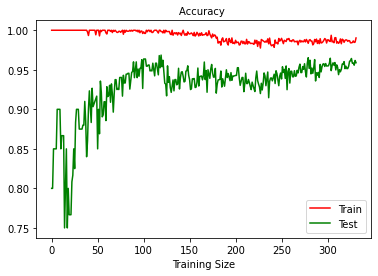

In [78]:
import matplotlib.pyplot as plt
plt.plot(array_train, label='Train',color='red')
plt.plot(array_test,  label='Test',color ='green' )
plt.title("Accuracy ", fontsize=10)
plt.xlabel('Training Size')
plt.legend(loc='lower right')
plt.show()

From the learning curve above, we can see when the train size equals to around 300, the model achieves its maximal potential ( 𝐴𝑐𝑐_𝑡𝑒𝑠𝑡≈𝐴𝑐𝑐_𝑡𝑟𝑎𝑖𝑛 )